In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import calc_footprint_FFP as fp

In [4]:
EC = pd.read_csv(r'C:\Users\user\Desktop\Mukhrino\ryam\2022-06-16T173000_AIU-2262ryam\output\eddypro_exp_fluxnet_2022-06-16T180056_exp.csv', sep=',')
EC

TIMESTAMP_START  TIMESTAMP_END  DOY_START   DOY_END  \
0     202206161730   202206161800    167.729  167.7498   

                          FILENAME_HF  SW_IN_POT  NIGHT  EXPECT_NR  FILE_NR  \
0  2022-06-16T173000_AIU-2262ryam.ghg     422.08      0      18000    18000   

   CUSTOM_FILTER_NR  ...  CUSTOM_H2O_MEAN.1  CUSTOM_DEW_POINT_MEAN  \
0             18000  ...            10.0052                7.00946   

   CUSTOM_AVG_SIGNAL_STRENGTH_7200_MEAN  CUSTOM_CO2_SIGNAL_STRENGTH_7200_MEAN  \
0                                104.16                               103.949   

   CUSTOM_H2O_SIGNAL_STRENGTH_7200_MEAN  \
0                                104.37   

   CUSTOM_DELTA_SIGNAL_STRENGTH_7200_MEAN  CUSTOM_FLOWRATE_MEAN  \
0                               -0.421297              0.000178   

   CUSTOM_HIT_POWER_MEAN  CUSTOM_HIT_VIN_MEAN  NUM_BIOMET_VARS  
0                    2.0              10.8541                0  

[1 rows x 482 columns]

In [6]:
EC[['TIMESTAMP_START','H','WS','WS_MAX','WD','T_SONIC','MO_LENGTH','ZL','USTAR',]]

TIMESTAMP_START      H       WS   WS_MAX       WD  T_SONIC  MO_LENGTH  \
0     202206161730 -1.567  1.26683  1.77057  139.434  17.6519    15.0327   

         ZL     USTAR  
0  0.532174  0.064458

In [5]:
EC = EC.dropna(axis=1)
EC

TIMESTAMP_START  TIMESTAMP_END  DOY_START   DOY_END  \
0     202206161730   202206161800    167.729  167.7498   

                          FILENAME_HF  SW_IN_POT  NIGHT  EXPECT_NR  FILE_NR  \
0  2022-06-16T173000_AIU-2262ryam.ghg     422.08      0      18000    18000   

   CUSTOM_FILTER_NR  ...  CUSTOM_H2O_MEAN.1  CUSTOM_DEW_POINT_MEAN  \
0             18000  ...            10.0052                7.00946   

   CUSTOM_AVG_SIGNAL_STRENGTH_7200_MEAN  CUSTOM_CO2_SIGNAL_STRENGTH_7200_MEAN  \
0                                104.16                               103.949   

   CUSTOM_H2O_SIGNAL_STRENGTH_7200_MEAN  \
0                                104.37   

   CUSTOM_DELTA_SIGNAL_STRENGTH_7200_MEAN  CUSTOM_FLOWRATE_MEAN  \
0                               -0.421297              0.000178   

   CUSTOM_HIT_POWER_MEAN  CUSTOM_HIT_VIN_MEAN  NUM_BIOMET_VARS  
0                    2.0              10.8541                0  

[1 rows x 321 columns]

In [33]:
for i in EC.columns:
    print(i)

TIMESTAMP_START
TIMESTAMP_END
DOY_START
DOY_END
FILENAME_HF
SW_IN_POT
NIGHT
EXPECT_NR
FILE_NR
CUSTOM_FILTER_NR
WD_FILTER_NR
SONIC_NR
T_SONIC_NR
CO2_NR
H2O_NR
TAU_NR
H_NR
FC_NR
LE_NR
TAU
H
LE
ET
FC
FH2O
SET_SINGLE
FC_VADV
FH2O_VADV
U_UNROT
V_UNROT
W_UNROT
U
V
W
WS
WS_MAX
WD
WD_SIGMA
USTAR
TKE
MO_LENGTH
ZL
BOWEN
TSTAR
T_SONIC
TA_EP
PA_EP
RH_EP
AIR_MV
AIR_DENSITY
AIR_RHO_CP
VAPOR_DENSITY
VAPOR_PARTIAL_PRESSURE
VAPOR_PARTIAL_PRESSURE_SAT
SPECIFIC_HUMIDITY
VPD_EP
TDEW
DRYAIR_PARTIAL_PRESSURE
DRYAIR_DENSITY
DRYAIR_MV
SPECIFIC_HEAT_EVAP
VAPOR_DRYAIR_RATIO
CO2_MEAS_TYPE
CO2_MOLAR_DENSITY
CO2_MIXING_RATIO
CO2
H2O_MEAS_TYPE
H2O_MOLAR_DENSITY
H2O_MIXING_RATIO
H2O
CO2_TLAG_ACTUAL
CO2_TLAG_USED
CO2_TLAG_NOMINAL
CO2_TLAG_MIN
CO2_TLAG_MAX
H2O_TLAG_ACTUAL
H2O_TLAG_USED
H2O_TLAG_NOMINAL
H2O_TLAG_MIN
H2O_TLAG_MAX
U_MEDIAN
V_MEDIAN
W_MEDIAN
T_SONIC_MEDIAN
CO2_MEAS_MEDIAN
H2O_MEAS_MEDIAN
U_P25
V_P25
W_P25
T_SONIC_P25
CO2_MEAS_P25
H2O_MEAS_P25
U_P75
V_P75
W_P75
T_SONIC_P75
CO2_MEAS_P75
H2O_MEAS_P75
U_SIGMA

TIMESTAMP_START      H       WS   WS_MAX       WD  T_SONIC  MO_LENGTH  \
0     202206161730 -1.567  1.26683  1.77057  139.434  17.6519    15.0327   

         ZL     USTAR  
0  0.532174  0.064458

In [55]:

L = EC['MO_LENGTH'] #-(EC['T_SONIC']+273.15)*EC['USTAR']**3/(9.8*0.4*EC['H']/EC['AIR_RHO_CP'])

Omega = 7.2921*10**(-5) #угловая скорость вращения Земли вокруг оси с^-1
f = 2*Omega*np.sin(np.radians(60.89)) #параметр Кориолиса (задать широту)

h = (-1+(1+2.28*EC['USTAR']/(EC['MO_LENGTH']*f))**(1/2))*EC['MO_LENGTH']/3.8
print('h=',h.values[0])

h= 30.92042798252898



Error(0009):
 ustar (friction velocity) must be >=0.1.


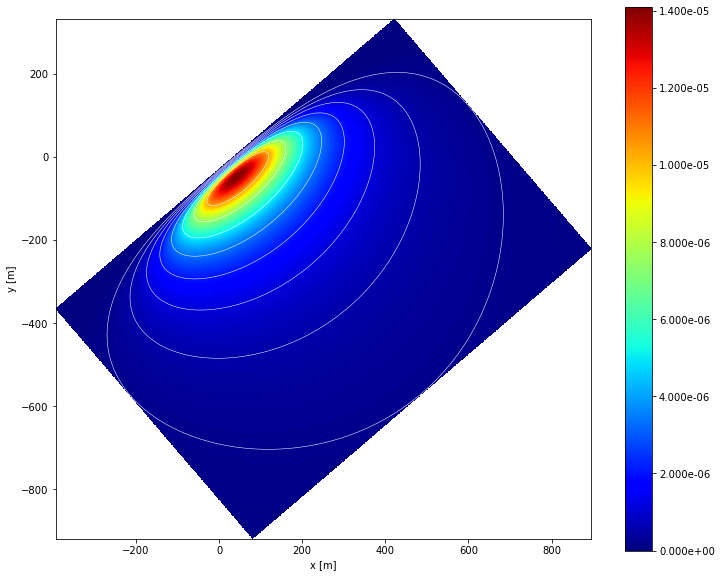

{'x_ci_max': array([73.82703135]),
 'x_ci': array([  14.06144469,   16.59268272,   19.12392076, ..., 2540.23700499,
        2542.76824303, 2545.29948107]),
 'f_ci': array([9.67873005e-21, 1.06880452e-10, 1.68169472e-07, ...,
        1.88920606e-05, 1.88553826e-05, 1.88188114e-05]),
 'x_2d': array([[-393.5663396 , -391.92021592, -390.27409223, ...,   77.22503447,
           78.87115816,   80.51728184],
        [-391.64346602, -389.99734234, -388.35121865, ...,   79.14790805,
           80.79403174,   82.44015542],
        [-389.72059244, -388.07446876, -386.42834507, ...,   81.07078163,
           82.71690532,   84.36302901],
        ...,
        [ 417.88631158,  419.53243527,  421.17855896, ...,  888.67768566,
          890.32380935,  891.96993303],
        [ 419.80918517,  421.45530885,  423.10143254, ...,  890.60055924,
          892.24668293,  893.89280661],
        [ 421.73205875,  423.37818243,  425.02430612, ...,  892.52343282,
          894.16955651,  895.81568019]]),
 'y_2d': a

In [64]:
Omega = 7.2921*10**(-5) #угловая скорость вращения Земли вокруг оси с^-1
f = 2*Omega*np.sin(np.radians(60.89)) #параметр Кориолиса (задать широту)
h = (-1+(1+2.28*EC['USTAR']/(EC['MO_LENGTH']*f))**(1/2))*EC['MO_LENGTH']/3.8

fp.FFP(zm=8, z0=None, umean=EC['WS'].values[0], h=h.values[0], ol=EC['MO_LENGTH'].values[0], sigmav=1, ustar=EC['USTAR'].values, 
        wind_dir=EC['WD'].values[0], rs=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], rslayer=0,
        nx=1000, domain = [-200,200,-200,200], crop=1, fig=1)

In [40]:
0.532174*15.0327

8.0000120898

In [50]:
avg_T = 20
P = 1025
ustar = 0.3
H = -100

ro_CP = 1030*P*100/(287*(avg_T+273.15))
ro_CP

1254.8427182573525

In [ ]:
высота измерения
высота вытеснения или высота препятствия 
модуль скорости и стандартное отклонене
направление ветра или куда ориентированы оси
Температура на уровне измерений
Температура поверхности
Влажность воздуха
Плотность или давление

In [65]:
pd.Series.dropna?

In [77]:
Mukhrino.columns

Index(['Date Time ', 'Ta', 'rH', 'U', 'Dir', 'Ts1', 'Ts2', 'Ts3', 'Ts4', 'P',
       'Tsurf rad'],
      dtype='object')

In [2]:
n =None
n == None

True

In [32]:
np.*?

In [26]:
np.argwhere?

In [35]:
x = [1, -5, 3, 4, 8, 4, 3, 2, 1]
x = np.array(x)
np.mean(x)+np.std(x)

5.599319657044237

In [37]:
x[np.argwhere(np.abs(x)>np.mean(x)+np.std(x)*3)] = np.nan 
x

ValueError: cannot convert float NaN to integer

In [43]:
x = [1, -5, 3, 4, 100, -2, 3, 10, 1, 5]
x = np.array(x)
np.where(np.abs(x)>np.mean(x)+np.std(x)*3, np.nan, x)


array([  1.,  -5.,   3.,   4., 100.,  -2.,   3.,  10.,   1.,   5.])

In [44]:
np.std(x)

29.58039891549808

In [ ]:
def filtration(x, period, n_std, n):
    # x - time series
    # t - time index 
    # period - period of mining
    # n_std - number of sigma
    # n - repiats. If n  =None, filtration repeats as many times as it is needed
    if n != None:
        while i < int(n):
            
            i+=1
                

In [156]:
pd.to_datetime?

In [165]:
Mukhrino = pd.read_csv(r'C:\Users\user\Desktop\Мухрино\meteo_mukhrino2019.csv', sep=';', comment='#')
Mukhrino.drop(['Ta_2m','Ta_5sm','rH_2m','rH_5sm','Unnamed: 15','Ts2','Ts3','Ts4'], axis=1, inplace=True)
#Mukhrino.dropna(inplace=True)
Mukhrino = Mukhrino[:22708]
Mukhrino['Date Time '] =pd.to_datetime(Mukhrino['Date Time '], dayfirst=True)
Mukhrino.index = Mukhrino['Date Time ']
Mukhrino.drop('Date Time ', axis=1, inplace=True)
Mukhrino['Dir'] = Mukhrino['Dir'].replace('---',np.nan)
Mukhrino['Dir'] = Mukhrino['Dir'].astype('float')
Mukhrino

Ta    rH    U    Dir   Ts1       P  Tsurf rad
Date Time                                                           
2019-07-05 14:41:00  22.4  44.0  2.8  202.5  18.4   992.2      18.60
2019-07-05 14:42:00  22.4  43.0  3.4  225.0  18.3   992.2      18.53
2019-07-05 14:43:00  22.4  43.0  3.9  225.0  18.3   992.2      18.48
2019-07-05 14:44:00  22.3  44.0  3.5  202.5  18.3   992.3      18.39
2019-07-05 14:45:00  22.3  46.0  2.3  202.5  18.3   992.4      18.39
...                   ...   ...  ...    ...   ...     ...        ...
2019-07-21 09:04:00  28.9  48.0  1.3   90.0  30.3  1003.4      32.45
2019-07-21 09:05:00  28.9  47.0  2.7   67.5  29.8  1003.4      31.95
2019-07-21 09:06:00  29.1  47.0  3.1   90.0  29.8  1003.4      31.57
2019-07-21 09:07:00  28.9  45.0  3.6   90.0  29.6  1003.4      32.01
2019-07-21 09:08:00  28.9  44.0  4.0   67.5  29.4  1003.4      31.84

[22708 rows x 7 columns]

In [166]:
new_index = np.arange(pd.to_datetime('05-07-2019 15:00:00', dayfirst=True),pd.to_datetime('21-07-2019 09:01:00', dayfirst=True), np.timedelta64(30, 'm'), dtype='datetime64[s]')
binned = pd.cut(Mukhrino.index, bins=new_index)
Mukhrino_mean = Mukhrino.groupby(binned).mean()
Mukhrino_mean.index = new_index[:-1]
Mukhrino_mean

Ta         rH         U         Dir        Ts1  \
2019-07-05 15:00:00  21.510000  45.700000  1.920000  230.250000  18.016667   
2019-07-05 15:30:00  20.250000  50.133333  1.456667  242.250000  17.766667   
2019-07-05 16:00:00  18.936667  58.300000  0.560000  292.500000  17.623333   
2019-07-05 16:30:00  16.933333  69.866667  0.003333  270.000000  17.286667   
2019-07-05 17:00:00  14.820000  78.766667  0.156667  241.578947  17.023333   
...                        ...        ...       ...         ...        ...   
2019-07-21 06:30:00  27.816667  56.466667  2.660000   75.750000  28.190000   
2019-07-21 07:00:00  28.086667  54.000000  2.333333   90.000000  29.056667   
2019-07-21 07:30:00  28.340000  51.966667  2.570000   84.000000  30.446667   
2019-07-21 08:00:00  28.616667  49.333333  2.896667   73.500000  29.510000   
2019-07-21 08:30:00  28.826667  47.833333  3.093333   93.000000  28.920000   

                               P  Tsurf rad  
2019-07-05 15:00:00   992.703333  17.108667  
2019-07-05 15:30:00   992.873333  15.587667  
2019-07-05 16:00:00   993.010000  14.221000  
2019-07-05 16:30:00   993.080000  11.952667  
2019-07-05 17:00:00   993.303333  10.580333  
...                          ...        ...  
2019-07-21 06:30:00  1004.123333  32.298333  
2019-07-21 07:00:00  1003.960000  32.752333  
2019-07-21 07:30:00  1003.940000  33.102333  
2019-07-21 08:00:00  1003.683333  32.745000  
2019-07-21 08:30:00  1003.476667  32.353667  

[756 rows x 7 columns]

In [178]:
T.mean()

20.237671957690484

In [172]:
P = Mukhrino_mean['P']
T = Mukhrino_mean['Ta']
u = Mukhrino_mean['U']
f = Mukhrino_mean['rH']
T0 = Mukhrino_mean['Ts1']

In [173]:
z=2.0 #m height of measurements
kapa=0.4 #Karman's constant
g=9.814 #m/s^2 acceleration due to gravity
T_ref=293.15 #K Reference temperature (10C)
beta=g/T_ref #m/(K*s^2)Buoyancy parameter
l=2477000.0 #2501000.0 #J/kg enthalpy of vaporization at 10C
nu=0.0000141 #m^2/sec kinetic viscosity of air at 10C
R=287.0
Cp=1006.0 #J/(kg*K) heat capacity of dry air at constant pressure (101300 Pa)
fw=100.0 #% relative humidity at surface
nc_up=0.3 #upper border of neutral case 
nc_low=-0.3 #lower border of neutral case
#empirical constants of Magnus's formula
a=7.63 
b=241.9
E0=6.11 #Максимальная упругость водяного пара при 0 С
#empirical constants of Charnock's (Zilitinkevick's)formula
c1=0.111  
c2=0.0144
#empirical constants of Zilitinkevick's formula
A=4.0 
Bt=-3.2
Bq=-4.2
#empirical constants of universal non-dimensional functions in stable case
st1=4.7 #for momentum flux
st2=0.74 #for sensible and latent heat flux
st3=4.7
#empirical constants of universal non-dimensional functions in unstable case
un1=16.0 #for momentum flux
un2=16.0 #for sensible and latent heat flux
#initial fluxes value
H0n=0 #for neutral case
LE0n=0
H0st = -100 #for stable case
LE0st = -100
H0un = 100 #for unstable case
LE0un = 100
u_star0 = 0.3 #initial velocity scale value

Hcrst=-(10**(-6))
Hcrun=10**(-6)

P0=100000.0
# Critical values for iterational process convergency
epsi_H = 0.01 #Wt/m2
epsi_u = 0.000001 #m/s
epsi_LE = 0.01 #Wt/m2

In [174]:
ts_len=len(Mukhrino_mean)

u_star=np.zeros(ts_len) #m/s velocity scale
tau=np.zeros(ts_len) #N/m2 momentum flux
H=np.zeros(ts_len) #Wt/m2 sensible heat flux
LE=np.zeros(ts_len) #Wt/m2 latent heat flux

In [175]:
E=E0*10**(a*(T-273.15)/(b+T-273.15)) #Magnus formula
E_0=E0*10**(a*(T0-273.15)/(b+T0-273.15))
e=E*f/100
e0=E_0*fw/100
q=622*e/P*0.01 #0.622=Rc/Rp (gas constant relation) #kg/kg specific humidity
q0=622*e0/P*0.01 #P*100 (hPa to Pa) #kg/kg specific humidity at surface
roa=P/(R*T) #kg/m^3 air density
teta=(1-0.61*q)*T*(P0/P)**(R/Cp) #potentional temperature
teta0=(1-0.61*q0)*T0*(P0/P)**(R/Cp) #potencional temperature at surface

In [176]:
for i in range(ts_len):
    dT=T[i]-T0[i]
    if dT > nc_up: 
        H1,LE1 = H0st,LE0st #stable case
        print('s')
    elif dT < nc_low: 
        H1,LE1 = H0un,LE0un #unstable case
        print('u')
    else: 
        H1,LE1 = H0n,H0n #neutral case
        print('n')
    u_star1=u_star0
    k1,k2,k3=0,0,0
    while True:
        L,z0u,u_star[i]=L_z0u_ustar(u_star1)
        print('L=',L,'z='z0u,'u*='u_star[i])
        if abs(u_star[i]-u_star1)>epsi_u: u_star1=u_star[i]
        else: k1=1
        if k2==0:
            H[i]=heat_flux(Bt,teta[i],teta0[i],Cp)
            if abs(H[i]-H1)<epsi_H: k2=1 
            H1=H[i]
        if k3==0:
            LE[i]=heat_flux(Bq,q[i],q0[i],l)
            if abs(LE[i]-LE1)<epsi_LE: k3=1
            LE1=LE[i]
        if k1+k2+k3==3:break 
tau=-roa*u_star**2

s
3.4933333333333323 0 0.3 0.16080412049388476 -100 1.9200000000000002
3.150427131215773 0.00013727324617892803 0.013461789254219368
3.4933333333333323 0 0.013461789254219368 0.16080412049388476 4.516679830406205e+195 1.9200000000000002
28465.186709966158 0.00011652830767406954 0.06161979615545013
3.4933333333333323 0 0.06161979615545013 0.16080412049388476 1.0364997402158397e+197 1.9200000000000002
2730023.8845907045 3.097061029343067e-05 0.05571790130224103
3.4933333333333323 0 0.05571790130224103 0.16080412049388476 8.930482866217557e+196 1.9200000000000002
2018319.5359177738 3.264489971651035e-05 0.055931469868266775
3.4933333333333323 0 0.055931469868266775 0.16080412049388476 8.985760751629897e+196 1.9200000000000002
2041617.4673241111 3.257262929576728e-05 0.05592244686012902
3.4933333333333323 0 0.05592244686012902 0.16080412049388476 8.983428679688371e+196 1.9200000000000002
2040629.5498199 3.25756633490003e-05 0.05592282600770628
3.4933333333333323 0 0.05592244686012902 0.160

C:\Users\user\AppData\Local\Temp/ipykernel_4444/3863271555.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  z0u=c1*nu/u_star+c2*u_star**2/g #roughness length for momentum flux
C:\Users\user\AppData\Local\Temp/ipykernel_4444/3863271555.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  x=(1-un2*z/L)**0.25
C:\Users\user\AppData\Local\Temp/ipykernel_4444/3863271555.py:10: RuntimeWarning: divide by zero encountered in log
  u_star=kapa*u[i]/(np.log(z/z0u)-2*np.log((1+x)/2)+np.log((1+x**2)/2)-2*np.arctan(x)+np.pi/2)
C:\Users\user\AppData\Local\Temp/ipykernel_4444/3863271555.py:10: RuntimeWarning: invalid value encountered in double_scalars
  u_star=kapa*u[i]/(np.log(z/z0u)-2*np.log((1+x)/2)+np.log((1+x**2)/2)-2*np.arctan(x)+np.pi/2)
C:\Users\user\AppData\Local\Temp/ipykernel_4444/3425307799.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  x=(1-un2*z/L)**0.25


-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf na

-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.756666666666668 12 0.0 0.32683452929887236 nan 0.0
nan inf nan
-4.7566666

KeyboardInterrupt: 

In [ ]:
dic={'lat':mlat,'lon':mlon,'Qh':H,'Ql':LE,'tao_x':tau, 'tao_y':np.zeros(len(H))}
fluxes=pd.DataFrame(data=dic, columns=['lat','lon','Qh','Ql','tao_x','tao_y'])


In [170]:
def L_z0u_ustar(u_star):
    print(dT,i, u_star,roa[i],H1, u[i])
    z0u=c1*nu/u_star+c2*u_star**2/g #roughness length for momentum flux
    if dT > nc_up: #stable case
        L=-u_star**3*roa[i]*Cp/(kapa*beta*min(H1,Hcrst))
        u_star=kapa*u[i]/(np.log(z/z0u)+st1*((z-z0u)/L)) 
    elif dT < nc_low: #unstable case
        L=-u_star**3*roa[i]*Cp/(kapa*beta*max(H1,Hcrun))
        x=(1-un2*z/L)**0.25
        u_star=kapa*u[i]/(np.log(z/z0u)-2*np.log((1+x)/2)+np.log((1+x**2)/2)-2*np.arctan(x)+np.pi/2)
    else: 
        L="polushich"
        u_star=kapa*u[i]/np.log(z/z0u) #neutral case
    return L,z0u,u_star

In [171]:
def heat_flux(B,S,S0,l_or_Cp):
    #Rez0=z0u*u_star[i]/nu
    z0=z0u#*np.exp(kapa*(B-A*np.sqrt(Rez0)))
    if dT > nc_up: scale=(S-S0)/(st2*np.log(z/z0)+st3*((z-z0)/L))#stable case
    elif dT < nc_low: #unstable case
        x=(1-un2*z/L)**0.25
        scale=(S-S0)/(np.log(z/z0)-2*np.log((1+x**2)/2))
    else: scale=(S-S0)/np.log(z/z0) #neutral case
    flux=-l_or_Cp*roa[i]*u_star[i]*scale
    return flux